Prepared by:

**Ufuk Cem Birbiri**

Data Scientist & AI engineer

Eindhoven, Netherlands

ufuk.birbiri@gmail.com

#XGBoost Classifier using Starbucks Customer Survey

###Dataset Description
This dataset is composed of a survey questions of over 100 respondents for their buying behavior at Starbucks. Income is show in Malaysian Ringgit (RM). The dataset [link](https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey).

###Content
- Demographic info about customers – gender, age range, employment status, income range
- Their current behavior in buying Starbucks
- Facilities and features of Starbucks that contribute to the behavior
Inspiration



# **1. Exploring Data**



Import necessary libraries

In [48]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Visualization
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#Classification models
import xgboost as xgb
from sklearn.model_selection import train_test_split

#Data Processing
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

## 1.1 Load Data
After the Library is imported, the next step is to access and load the dataset.



In [49]:
survey = pd.read_csv('Starbucks_satisfactory_survey.csv')

## 1.2 Statistical Analysis and Visualisations
To understand the data, we will visualize some features and their relationships to the target column, namely the customer loyalty (Will they continue buying at Starbucks?)







Let's see the shape

In [50]:
survey.shape

(122, 21)

Look at a few rows


In [51]:
survey.head(2)

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes


## 1.3 Data Cleaning
It is necessary to clean up the non-essential data to achieve better performance



In [52]:
data = survey.copy()

Drop some columns

In [53]:
data.drop(columns=['Timestamp'], inplace = True)
data.drop(columns=['10. What do you most frequently purchase at Starbucks?'], inplace = True)
data.drop(columns=['19. How do you come to hear of promotions at Starbucks? Check all that apply.'], inplace = True)

Rename the columns

In [9]:
data.rename({'1. Your Gender' : 'Gender', '2. Your Age' : 'Age', '3. Are you currently....?' : 'Work_Status', '4. What is your annual income?' : 'Annual_Income', '5. How often do you visit Starbucks?' : 'Visit', '6. How do you usually enjoy Starbucks?' : 'Visit_Type', '7. How much time do you normally  spend during your visit?' : 'Visit_Duration', "8. The nearest Starbucks's outlet to you is...?" : 'Distance', '9. Do you have Starbucks membership card?' : 'Membership', '11. On average, how much would you spend at Starbucks per visit?' : 'Spending', '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:' : 'Product_Rating', '13. How would you rate the price range at Starbucks?' : 'Price_Rating', '14. How important are sales and promotions in your purchase decision?' : 'Promo_Rating', '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)' : 'Ambiance_Rating', '16. You rate the WiFi quality at Starbucks as..' : 'Wifi_Rating', '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)' : 'Service_Rating', '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?' : 'Hangout_Rating', '20. Will you continue buying at Starbucks?' : 'Loyality'} , inplace = True , axis = 1)

In [10]:
data.head()

,Gender,Age,Work_Status,Annual_Income,Visit,Visit_Type,Visit_Duration,Distance,Membership,Spending,Product_Rating,Price_Rating,Promo_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Hangout_Rating,Loyality
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Less than RM20,4,3,5,5,4,4,3,Yes
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Less than RM20,4,3,4,4,4,5,2,Yes
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Less than RM20,4,3,4,4,4,4,3,Yes
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Less than RM20,2,1,4,3,3,3,3,No
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Around RM20 - RM40,3,3,4,2,2,3,3,Yes


**Variable Description**

* *Gender*: Female or Male.
* *Age*: Age range of respondents.
* *Work_Status*: Respondent's employment status.
* *Annual_Income*: Respondent's income (in Malaysian Ringgit).
* *Visit*: How often the respondent visits.
* *Visit_Type*: Type of visit (eat in or take away).
* *Visit_Duration*: Length of visit.
* *Distance*: The distance of the nearest Starbucks outlet from the respondent's location.
* *Membership*: Ownership of respondent's membership card.
* *Spending*: The respondent's average purchase expenditure.
* *Product_Rating*: Product rating by respondents on a scale of 1-5.
* *Price_Rating*: Price rating by respondents on a scale of 1-5.
* *Promo_Rating*: Promotion rating by respondents on a scale of 1-5.
* *Ambiance_Rating*: Atmosphere rating by respondents on a scale of 1-5.
* *Wifi_Rating*: WiFi rating by respondents on a scale of 1-5.
* *Service_Rating*: Service rating by respondents on a scale of 1-5.
* *Hangout_Rating*: The suitability rating as a hangout place by respondents on a scale of 1-5.

**Variable Target**

* *Loyality*: Customer loyalty in product purchases. Will they continue buying at Starbucks? Yes, or no.







---


# **2. Data Preprocessing**



## 2.1 Missing Values
Missing values are natural in a dataset and should be removed or imputted.



In [11]:
# Check for missing values
data.isnull().any()

Gender             False
Age                False
Work_Status        False
Annual_Income      False
Visit              False
Visit_Type          True
Visit_Duration     False
Distance           False
Membership         False
Spending           False
Product_Rating     False
Price_Rating       False
Promo_Rating       False
Ambiance_Rating    False
Wifi_Rating        False
Service_Rating     False
Hangout_Rating     False
Loyality           False
dtype: bool

In [12]:
# Missing value is written as nan
data['Visit_Type'].unique()

array(['Dine in', 'Take away', 'Drive-thru', 'never', 'Never buy', nan,
       'I dont like coffee', 'Never', 'Never '], dtype=object)

In [13]:
# Change the value of nan to never
data['Visit_Type'].fillna('never', inplace = True)

In [14]:
# Delete redundant data to the Never Buy value
data['Visit_Type'].replace(['never', 'Never buy', 'I dont like coffee', 'Never', 'Never '], 'Never buy', inplace = True)
data['Visit_Type'].value_counts()

Take away     49
Dine in       46
Drive-thru    20
Never buy      7
Name: Visit_Type, dtype: int64

In [15]:
# Make sure there are no more missing values
data.isnull().any()

Gender             False
Age                False
Work_Status        False
Annual_Income      False
Visit              False
Visit_Type         False
Visit_Duration     False
Distance           False
Membership         False
Spending           False
Product_Rating     False
Price_Rating       False
Promo_Rating       False
Ambiance_Rating    False
Wifi_Rating        False
Service_Rating     False
Hangout_Rating     False
Loyality           False
dtype: bool


## 2.2 Change Categorical Variables to Numerical
For ML model, the categorical data should be replaced by numerical values.



In [16]:
data.dtypes

Gender             object
Age                object
Work_Status        object
Annual_Income      object
Visit              object
Visit_Type         object
Visit_Duration     object
Distance           object
Membership         object
Spending           object
Product_Rating      int64
Price_Rating        int64
Promo_Rating        int64
Ambiance_Rating     int64
Wifi_Rating         int64
Service_Rating      int64
Hangout_Rating      int64
Loyality           object
dtype: object

In [17]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
data['Age'].unique()

array(['From 20 to 29', 'From 30 to 39', '40 and above', 'Below 20'],
      dtype=object)

In [19]:
data['Work_Status'].unique()

array(['Student', 'Employed', 'Self-employed', 'Housewife'], dtype=object)

In [20]:
data['Annual_Income'].unique()

array(['Less than RM25,000', 'RM50,000 - RM100,000',
       'RM25,000 - RM50,000', 'RM100,000 - RM150,000',
       'More than RM150,000'], dtype=object)

In [21]:
data['Visit'].unique()

array(['Rarely', 'Monthly', 'Weekly', 'Never', 'Daily'], dtype=object)

In [22]:
data['Visit_Type'].unique()

array(['Dine in', 'Take away', 'Drive-thru', 'Never buy'], dtype=object)

In [23]:
data['Visit_Duration'].unique()

array(['Between 30 minutes to 1 hour', 'Below 30 minutes',
       'More than 3 hours', 'Between 1 hour to 2 hours',
       'Between 2 hours to 3 hours'], dtype=object)

In [24]:
data['Distance'].unique()

array(['within 1km', '1km - 3km', 'more than 3km'], dtype=object)

In [25]:
data['Membership'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
data['Spending'].unique()

array(['Less than RM20', 'Around RM20 - RM40', 'More than RM40', 'Zero'],
      dtype=object)

In [27]:
data["Gender"].replace({"Female": 1, "Male": 0}, inplace=True)
data["Age"].replace({"Below 20": 0, "From 20 to 29": 1, "From 30 to 39": 2, "40 and above": 3}, inplace=True)
data["Work_Status"].replace({"Student": 0, "Employed": 1, "Self-employed": 2, "Housewife": 3}, inplace=True)
data["Annual_Income"].replace({"Less than RM25,000": 0, "RM25,000 - RM50,000": 1, "RM50,000 - RM100,000": 2, "RM100,000 - RM150,000": 3, "More than RM150,000": 4}, inplace=True)
data["Visit"].replace({"Never": 0, "Rarely": 1, "Monthly": 2, "Weekly": 3, "Daily": 4}, inplace=True)
data["Visit_Type"].replace({"Never buy": 0, "Take away": 1, "Drive-thru": 2, "Dine in": 3}, inplace=True)
data["Visit_Duration"].replace({"Below 30 minutes": 0, "Between 30 minutes to 1 hour": 1, "Between 1 hour to 2 hours": 2, "Between 2 hours to 3 hours": 3, "More than 3 hours": 4}, inplace=True)
data["Distance"].replace({"within 1km": 0, "1km - 3km": 1, "more than 3km": 2}, inplace=True)
data["Membership"].replace({"No": 0, "Yes": 1}, inplace=True)
data["Spending"].replace({"Zero": 0, "Less than RM20": 1, "Around RM20 - RM40": 2, "More than RM40": 3}, inplace=True)

Encode the target variable

In [33]:
data["Loyality"].replace({"Yes": 1, "No": 0}, inplace=True)

In [34]:
data.dtypes

Gender             int64
Age                int64
Work_Status        int64
Annual_Income      int64
Visit              int64
Visit_Type         int64
Visit_Duration     int64
Distance           int64
Membership         int64
Spending           int64
Product_Rating     int64
Price_Rating       int64
Promo_Rating       int64
Ambiance_Rating    int64
Wifi_Rating        int64
Service_Rating     int64
Hangout_Rating     int64
Loyality           int64
dtype: object

In [35]:
data.head()

,Gender,Age,Work_Status,Annual_Income,Visit,Visit_Type,Visit_Duration,Distance,Membership,Spending,Product_Rating,Price_Rating,Promo_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Hangout_Rating,Loyality
0,1,1,0,0,1,3,1,0,1,1,4,3,5,5,4,4,3,1
1,1,1,0,0,1,1,0,1,1,1,4,3,4,4,4,5,2,1
2,0,1,1,0,2,3,1,2,1,1,4,3,4,4,4,4,3,1
3,1,1,0,0,1,1,0,2,0,1,2,1,4,3,3,3,3,0
4,0,1,0,0,2,1,1,1,0,2,3,3,4,2,2,3,3,1




---


# **Modelling**



At this stage a model will be formed from the training data.



In [36]:
# Retrieve dataset
datasb = data
# Split in X and y
X, y = datasb.iloc[:,:-1], datasb.iloc[:,-1]

# The dataset is divided into two, for training data and testing data
# Data Training : Data Testing - 70% : 30%
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=123)

In [39]:
# Create an XGBoost Classifier model
XGBoost_classifier = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=123, learning_rate=0.1, max_depth=5, colsample_bytree=1, subsample=1)

XGBClassifier Parameters:

* Objective - What is your goal for this particular problem, here we have a binary classification problem of 2 class hence use binary:logistic.
* n_estimators - The number of trees we use for the classification problem.
* learning_rate - How big a step to take.
* max_depth - Maximum depth of each tree.
* colsample_bytree - What percentage of features each tree has.
* subsample - What percentage of data is used by each tree.

In [40]:
# Fitting model XGBoost
XGBoost_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [41]:
# Prediction of testing data
predictions = XGBoost_classifier.predict(X_test)

In [42]:
# View accuracy scores
accuracy = float(np.sum(predictions==y_test))/y_test.shape[0]
print("Accuracy: %f" % (accuracy))

Accuracy: 0.891892


We got 89% accuracy, not bad!

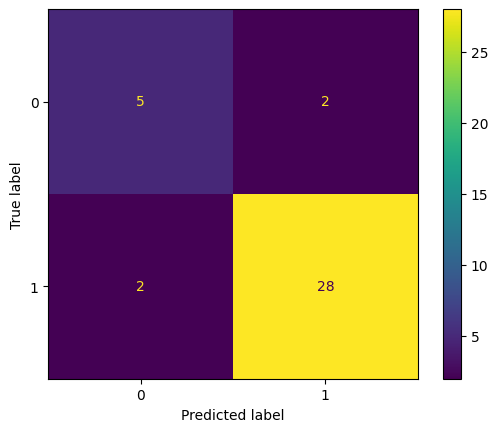

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=XGBoost_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_classifier.classes_)

disp.plot()
plt.show()

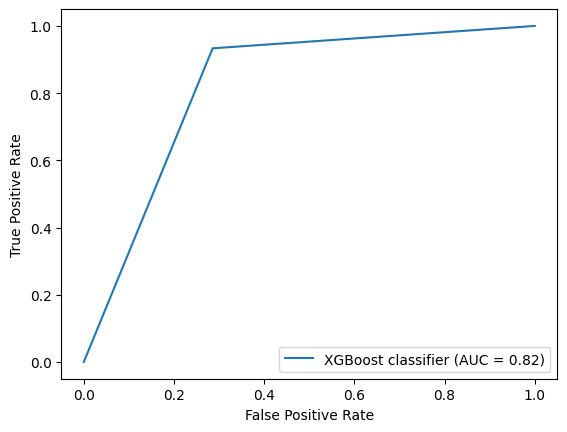

In [60]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='XGBoost classifier')
display.plot()

plt.show()

ROC Curve or Receiver Operating Characteristic Curve, is a graph that shows the performance of the classification model across all classification thresholds. This curve plots two parameters: True Positive Rate and False Positive Rate.

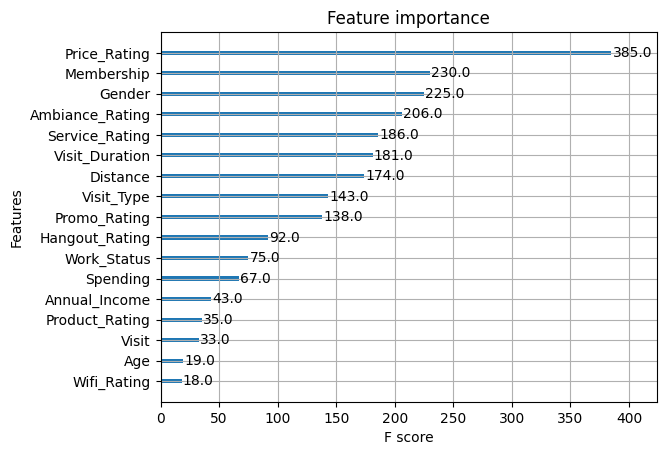

In [61]:
# View the most important features in the classification
xgb.plot_importance(XGBoost_classifier)
plt.show()

It can be seen here, Price_Rating is the most important attribute in predicting customer loyalty.